# Table of Contents
#### Data Science Workflow
An introduction and summary of the approach I took to complete this project
#### Business Case and Business Value  
Background  
Goal  
Why is this important?  
#### Obtaining The Data
Sourcing the data  
Importing the CSVs  
Importing packages  
#### Scrubbing The Data
DataCleaning.ipynb  
#### Exploring The Data
Use basic plots to visually examine relationships within the dataset  
Exploration and familiarization with the dataset through statistical analysis  
Detecting potential skews  
Investigating features  
#### Modeling The Data
Train and test split the data  
Create a baseline model to work up from  
Model the non-transformed data and review results   
Model the normalized & transformed data and compare results to the non-transformed    
Create multiple types of models to see what is the most accurate, efficient, and informative   
Tune hyperparameters to find the ideal parameters for best performing model  
#### Interpreting The Data
Compare the models created in the last step and weigh the pros & cons of each type  
Review the findings table to see which model is best, depending on our goals(accuracy, computational efficiency, etc)  
#### Conclusion
Expand upon our model review from the interpretation stage  
Conclusion and opinion on my ideal model    
Potential future work  
References

## Data Science Workflow
##### For this project I am going to use the OSEMiN process
##### (Obtain, Scrub, Explore, Model, Interpret) 

- **Obtain** - This part was simple for this project, my dataset is Dr Robert Lyon's Predicting a Pulsar Star dataset from Kaggle: (https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/data)
- **Scrub** - The objective here is to identify errors, potential missing or corrupted fields in the data, and to clean up the dataset by discarding, replacing, or filling missing values and errors. 
- **Explore** - This is largely what EDA is. The goal in this phase is to understand patterns within our dataset by visualizing and testing to examine relationships in the data. 
- **Model** - This step encompases the higher level pre-processing such as normalization and synthetic oversampling of the minority class. After that we're ready to train some models to be able to give us some accurate predictive power to make intelligent business decisions. There are multiple steps of evaluation and refining of the models to ensure they're as accurate and unbiased as possible. 
- **Interpret** - In the final step, we examine our findings developed by our modeling and indentify important insights. As more data becomes available, this cycle can repeat and continue in a loop to build a faster, less biased, and more accurate model.
 
Below you can follow the different stages of the EDA and modeling process by scrolling to the respective title.

## Business Case
#### Background
Soccer is the most watched and bet-on sport in the world. With over 3 billion global fans and viewers, it dwarfs 2nd place Cricket by over 1 billion fans. The sports betting industry is worth an estimated $3 trillion, with soccer making up the largest share of that for a single sport. 
My goal is to predict the winner of a soccer match, using different features such as, Soccer Power Index (SPI), past performances and odds. With how many people bet on the sport daily, this could amount to be a popular and useful too to help gamblers get an edge on the house, and therefore reap higher returns on their bets. 

#### Overall Goal:  
My goal is to predict the winner of a soccer match, using different features such as, Soccer Power Index (SPI), past performances and odds. With how many people bet on the sport daily, this could amount to be a popular and useful too to help gamblers get an edge on the house, and therefore reap higher returns on their bets. 


## Business Value  
### Why is this important?
The global sports gambling market is a multi-trillion-dollar industry, with much of that having to do with European club soccer. My target audience is the over 3 billion people who consider themselves soccer fans, and specifically the subset of that who intend to gamble their hard-earned money on it. I aim to assist these people in educating their decision-making to be able to maximize returns and profits on the bets that are placed. 


# Obtain the Data  
I'm using SPI data and match data from FiveThirtyEight to model. I've preprocessed the data a bit in the notebook titled DataCleaning.ipynb. In this stage, I'll import the dataset and all the neccesary libraries for the whole process.   

In [1]:
# import necessary tools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
import plotly.express as px
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')

import itertools
import math
import time

import statsmodels.formula.api as smf
import xgboost as xgb
from xgboost import XGBClassifier
from scipy import stats
from sklearn import svm
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, \
    roc_curve, auc, mean_squared_error, roc_auc_score, recall_score, precision_score, \
    plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.pipeline import Pipeline

rng = np.random.RandomState(25)

import warnings
warnings.filterwarnings('ignore')

In [2]:
club_data = pd.read_csv('SPI_data.csv')
club_data.head()

Unnamed: 0  rank  prev_rank                 name                    league  \
0           0     1          1        Bayern Munich         German Bundesliga   
1           1     2          2      Manchester City   Barclays Premier League   
2           2     3          3            Barcelona  Spanish Primera Division   
3           3     4          4            Liverpool   Barclays Premier League   
4           4     5          5  Paris Saint-Germain            French Ligue 1   

    off   def    spi  
0  3.51  0.43  93.96  
1  2.86  0.24  92.84  
2  3.01  0.50  90.16  
3  2.79  0.46  88.95  
4  2.89  0.52  88.85

In [3]:
match_data = pd.read_csv('SPI_matches_all.csv')
match_data.head()

Unnamed: 0  season        date  league_id                   league  \
0          10  2016.0  2016-08-12     1843.0           French Ligue 1   
1          11  2016.0  2016-08-12     1843.0           French Ligue 1   
2          12  2016.0  2016-08-13     2411.0  Barclays Premier League   
3          13  2016.0  2016-08-13     2411.0  Barclays Premier League   
4          14  2016.0  2016-08-13     2411.0  Barclays Premier League   

            team1                 team2   spi1   spi2   prob1  ...  \
0          Bastia   Paris Saint-Germain  51.16  85.68  0.0463  ...   
1       AS Monaco              Guingamp  68.85  56.48  0.5714  ...   
2       Hull City        Leicester City  53.57  66.81  0.3459  ...   
3  Crystal Palace  West Bromwich Albion  55.19  58.66  0.4214  ...   
4         Everton     Tottenham Hotspur  68.02  73.25  0.3910  ...   

   importance1.1  importance2.1  score1.1  score2.1  xg1.1  xg2.1  nsxg1.1  \
0            NaN            NaN       NaN       NaN    NaN    NaN      NaN   
1            NaN            NaN       NaN       NaN    NaN    NaN      NaN   
2            NaN            NaN       NaN       NaN    NaN    NaN      NaN   
3            NaN            NaN       NaN       NaN    NaN    NaN      NaN   
4            NaN            NaN       NaN       NaN    NaN    NaN      NaN   

   nsxg2.1  adj_score1.1  adj_score2.1  
0      NaN           NaN           NaN  
1      NaN           NaN           NaN  
2      NaN           NaN           NaN  
3      NaN           NaN           NaN  
4      NaN           NaN           NaN  

[5 rows x 47 columns]

# Scrub and Explore the Data
The data was tidied up in the DataCleaning.ipynb Notebook before being imported here. I will continue to tweak and pare the dataset while I explore it more and get ready to model. The line between scrubbing and exploring is blurry at best, and these two stages of the project flow occur simultaneously.  
At the end of this section, the data will be prepared for the modeling phase and ready to be appropriately split.  

In [4]:
club_data.describe()

Unnamed: 0        rank   prev_rank         off         def         spi
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000
mean    70.742574   71.742574   71.732673    1.915842    0.847723   68.662772
std     51.988971   51.988971   51.941870    0.406035    0.240761   11.032996
min      0.000000    1.000000    1.000000    1.350000    0.240000   49.100000
25%     27.000000   28.000000   28.000000    1.620000    0.710000   59.130000
50%     61.000000   62.000000   62.000000    1.810000    0.860000   66.850000
75%    112.000000  113.000000  113.000000    2.160000    1.030000   76.190000
max    205.000000  206.000000  206.000000    3.510000    1.320000   93.960000

In [5]:
club_data = club_data.drop(columns="Unnamed: 0")
club_data.head()

rank  prev_rank                 name                    league   off   def  \
0     1          1        Bayern Munich         German Bundesliga  3.51  0.43   
1     2          2      Manchester City   Barclays Premier League  2.86  0.24   
2     3          3            Barcelona  Spanish Primera Division  3.01  0.50   
3     4          4            Liverpool   Barclays Premier League  2.79  0.46   
4     5          5  Paris Saint-Germain            French Ligue 1  2.89  0.52   

     spi  
0  93.96  
1  92.84  
2  90.16  
3  88.95  
4  88.85

In [6]:
match_data = match_data.drop(columns="Unnamed: 0")
match_data.head()

season        date  league_id                   league           team1  \
0  2016.0  2016-08-12     1843.0           French Ligue 1          Bastia   
1  2016.0  2016-08-12     1843.0           French Ligue 1       AS Monaco   
2  2016.0  2016-08-13     2411.0  Barclays Premier League       Hull City   
3  2016.0  2016-08-13     2411.0  Barclays Premier League  Crystal Palace   
4  2016.0  2016-08-13     2411.0  Barclays Premier League         Everton   

                  team2   spi1   spi2   prob1   prob2  ...  importance1.1  \
0   Paris Saint-Germain  51.16  85.68  0.0463  0.8380  ...            NaN   
1              Guingamp  68.85  56.48  0.5714  0.1669  ...            NaN   
2        Leicester City  53.57  66.81  0.3459  0.3621  ...            NaN   
3  West Bromwich Albion  55.19  58.66  0.4214  0.2939  ...            NaN   
4     Tottenham Hotspur  68.02  73.25  0.3910  0.3401  ...            NaN   

   importance2.1  score1.1  score2.1  xg1.1  xg2.1  nsxg1.1  nsxg2.1  \
0            NaN       NaN       NaN    NaN    NaN      NaN      NaN   
1            NaN       NaN       NaN    NaN    NaN      NaN      NaN   
2            NaN       NaN       NaN    NaN    NaN      NaN      NaN   
3            NaN       NaN       NaN    NaN    NaN      NaN      NaN   
4            NaN       NaN       NaN    NaN    NaN      NaN      NaN   

   adj_score1.1  adj_score2.1  
0           NaN           NaN  
1           NaN           NaN  
2           NaN           NaN  
3           NaN           NaN  
4           NaN           NaN  

[5 rows x 46 columns]

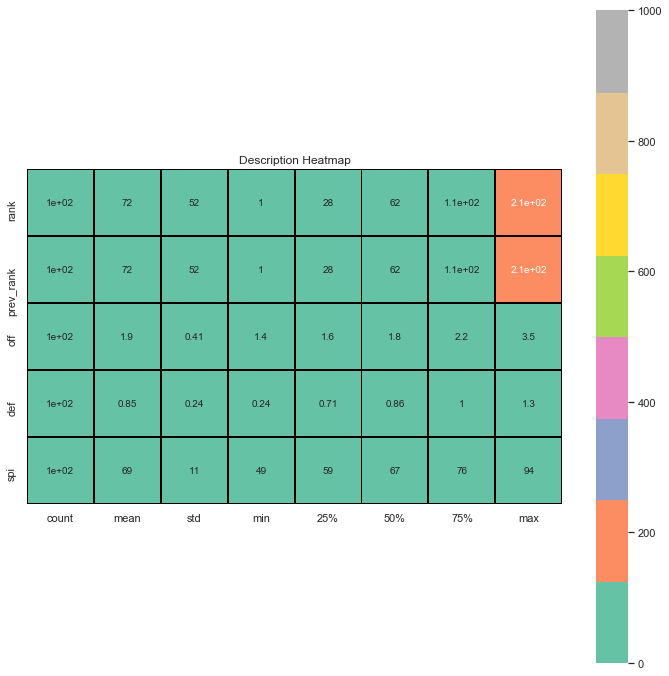

In [7]:
# Looking at the club data description
plt.figure(figsize=(12,12))
ax = sns.heatmap(club_data.describe().transpose(),
           annot=True, linecolor="black",
            linewidth=1, square=True, vmin=0, vmax=1000, 
                 cmap=sns.color_palette("Set2"))
plt.title("Description Heatmap")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

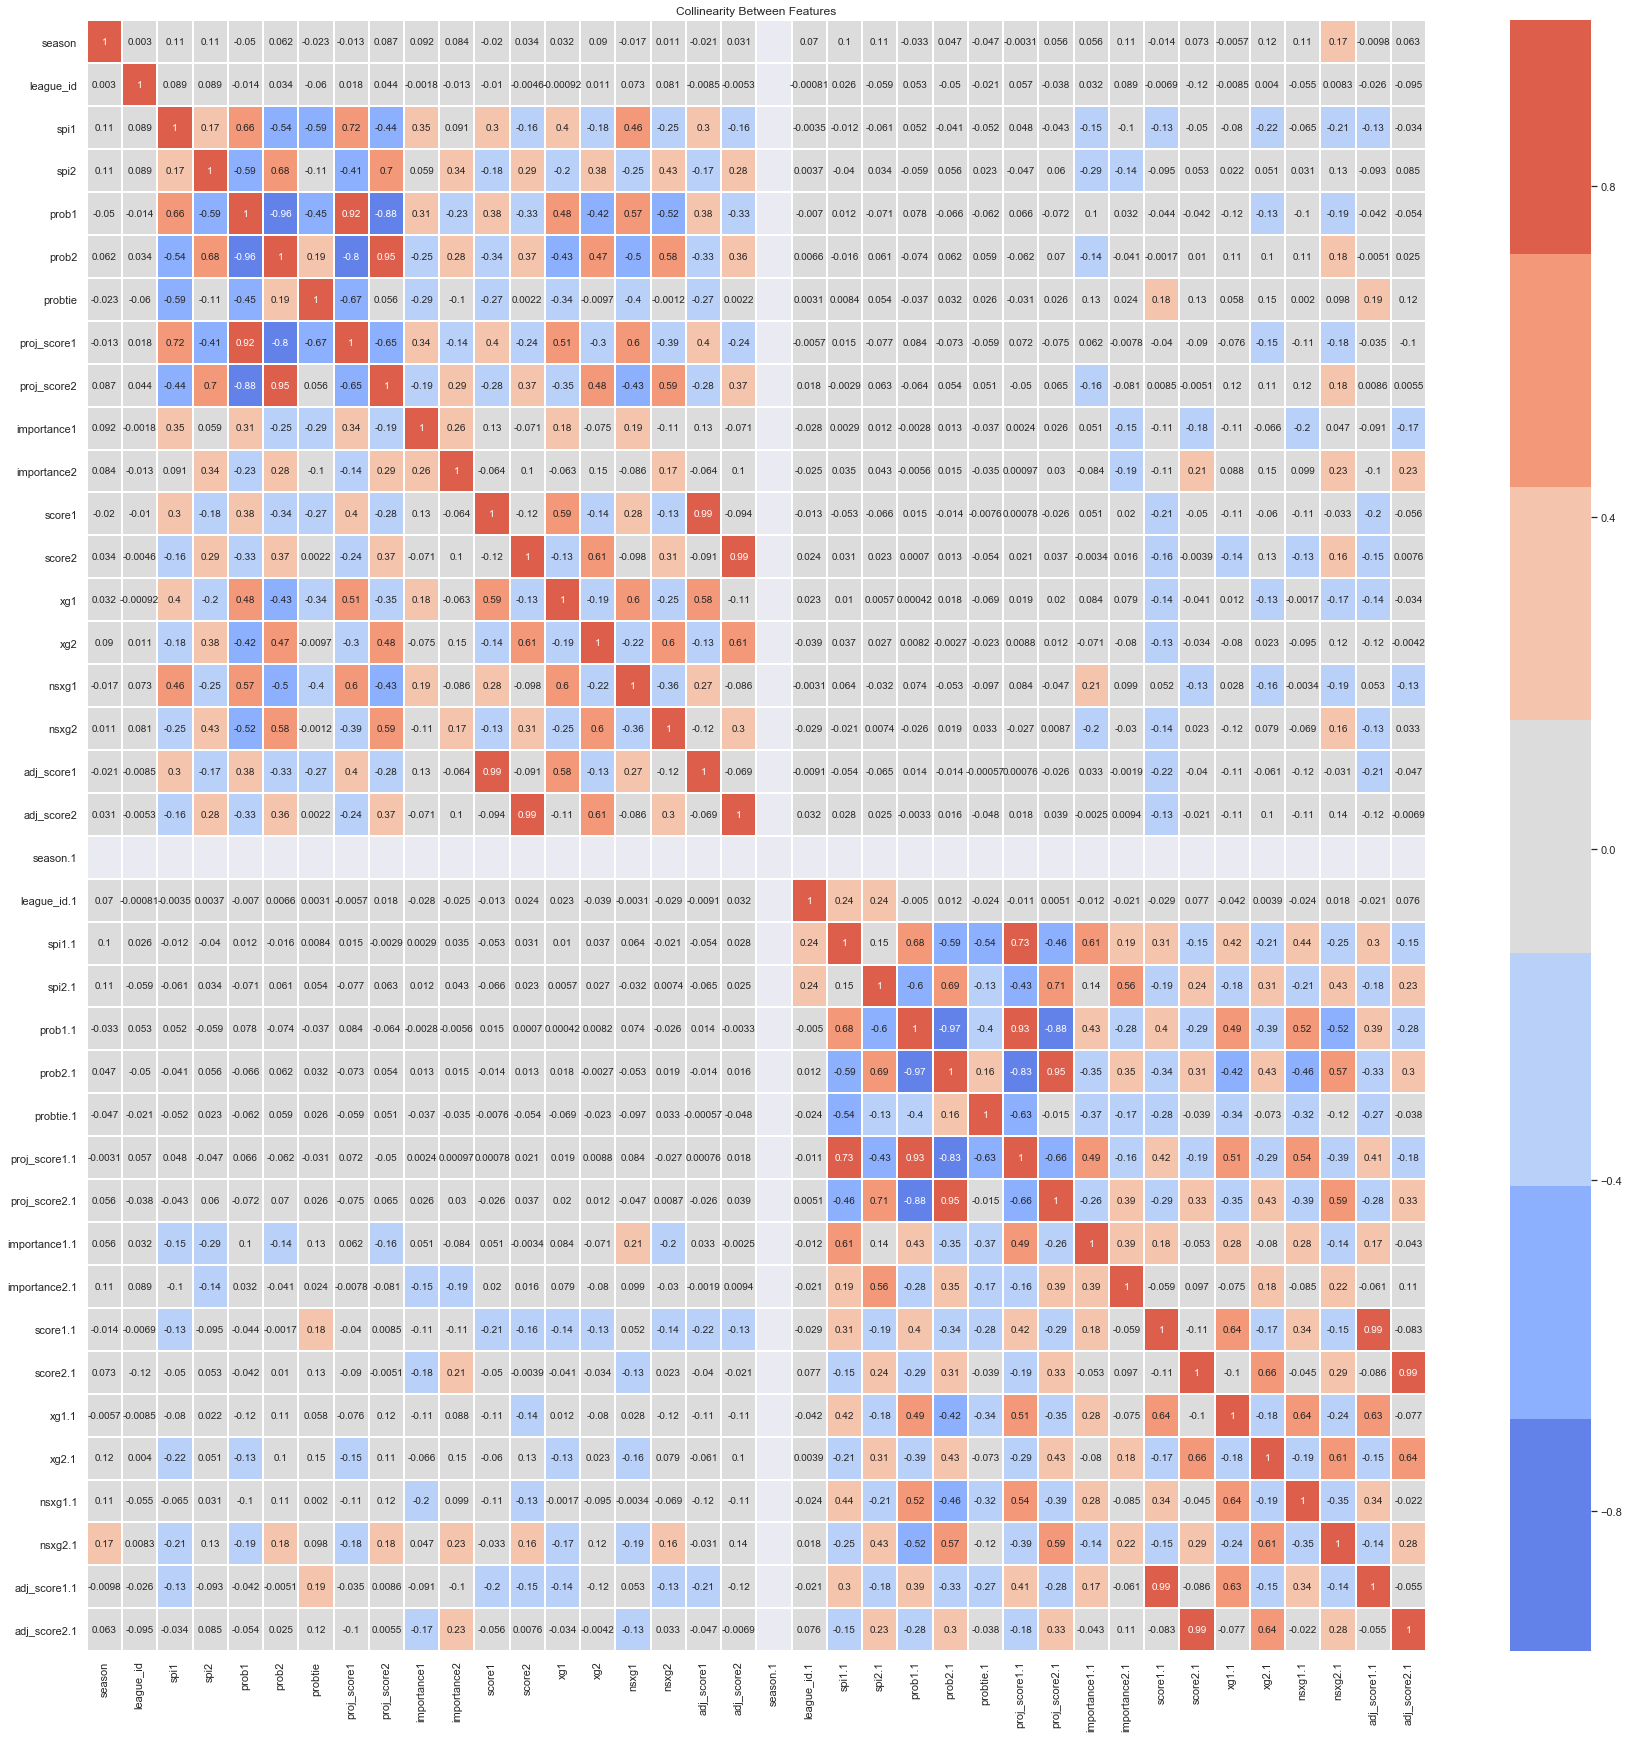

In [8]:
# Next I'll look at possible multicollinearity among the features
correlation = match_data.corr()
plt.figure(figsize=(30,30))
ax = sns.heatmap(correlation, annot=True, 
                cmap=sns.color_palette("coolwarm", 7),
                linewidth=1, linecolor="white")
plt.title("Collinearity Between Features")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

There are some redundant columns, and others that don't bring much meaningful information for modeling. I'll continue to pare down this dataset to a manageable level and reduce the number of features.  I want to reduce the number of features for selection in the final deployment so I will be removing all redundant columns, relative importances, NSXG, and all date/time related info.  

In [9]:
match_data_final = match_data[["league_id", "league", "team1", "team2", "spi1", "spi2",
                               "prob1", "prob2", "probtie", "proj_score1", "proj_score2", 
                               "score1", "score2", "xg1", "xg2"]].copy()
match_data_final.head(10)

league_id                   league            team1                 team2  \
0     1843.0           French Ligue 1           Bastia   Paris Saint-Germain   
1     1843.0           French Ligue 1        AS Monaco              Guingamp   
2     2411.0  Barclays Premier League        Hull City        Leicester City   
3     2411.0  Barclays Premier League   Crystal Palace  West Bromwich Albion   
4     2411.0  Barclays Premier League          Everton     Tottenham Hotspur   
5     2411.0  Barclays Premier League          Burnley          Swansea City   
6     2411.0  Barclays Premier League    Middlesbrough            Stoke City   
7     2411.0  Barclays Premier League      Southampton               Watford   
8     1843.0           French Ligue 1         Bordeaux            St Etienne   
9     2411.0  Barclays Premier League  Manchester City            Sunderland   

    spi1   spi2   prob1   prob2  probtie  proj_score1  proj_score2  score1  \
0  51.16  85.68  0.0463  0.8380   0.1157         0.91         2.36     0.0   
1  68.85  56.48  0.5714  0.1669   0.2617         1.82         0.86     2.0   
2  53.57  66.81  0.3459  0.3621   0.2921         1.16         1.24     2.0   
3  55.19  58.66  0.4214  0.2939   0.2847         1.35         1.14     0.0   
4  68.02  73.25  0.3910  0.3401   0.2689         1.47         1.38     1.0   
5  58.98  59.74  0.4482  0.2663   0.2854         1.37         1.05     0.0   
6  56.32  60.35  0.4380  0.2692   0.2927         1.30         1.01     1.0   
7  69.49  59.33  0.5759  0.1874   0.2367         1.91         1.05     1.0   
8  62.01  64.92  0.4232  0.2764   0.3004         1.39         1.14     3.0   
9  86.42  53.64  0.8152  0.0525   0.1323         2.69         0.48     2.0   

   score2   xg1   xg2  
0     1.0  0.97  0.63  
1     2.0  2.45  0.77  
2     1.0  0.85  2.77  
3     1.0  1.11  0.68  
4     1.0  0.73  1.11  
5     1.0  1.24  1.84  
6     1.0  1.40  0.55  
7     1.0  1.05  0.22  
8     2.0  1.03  1.84  
9     1.0  2.14  1.25

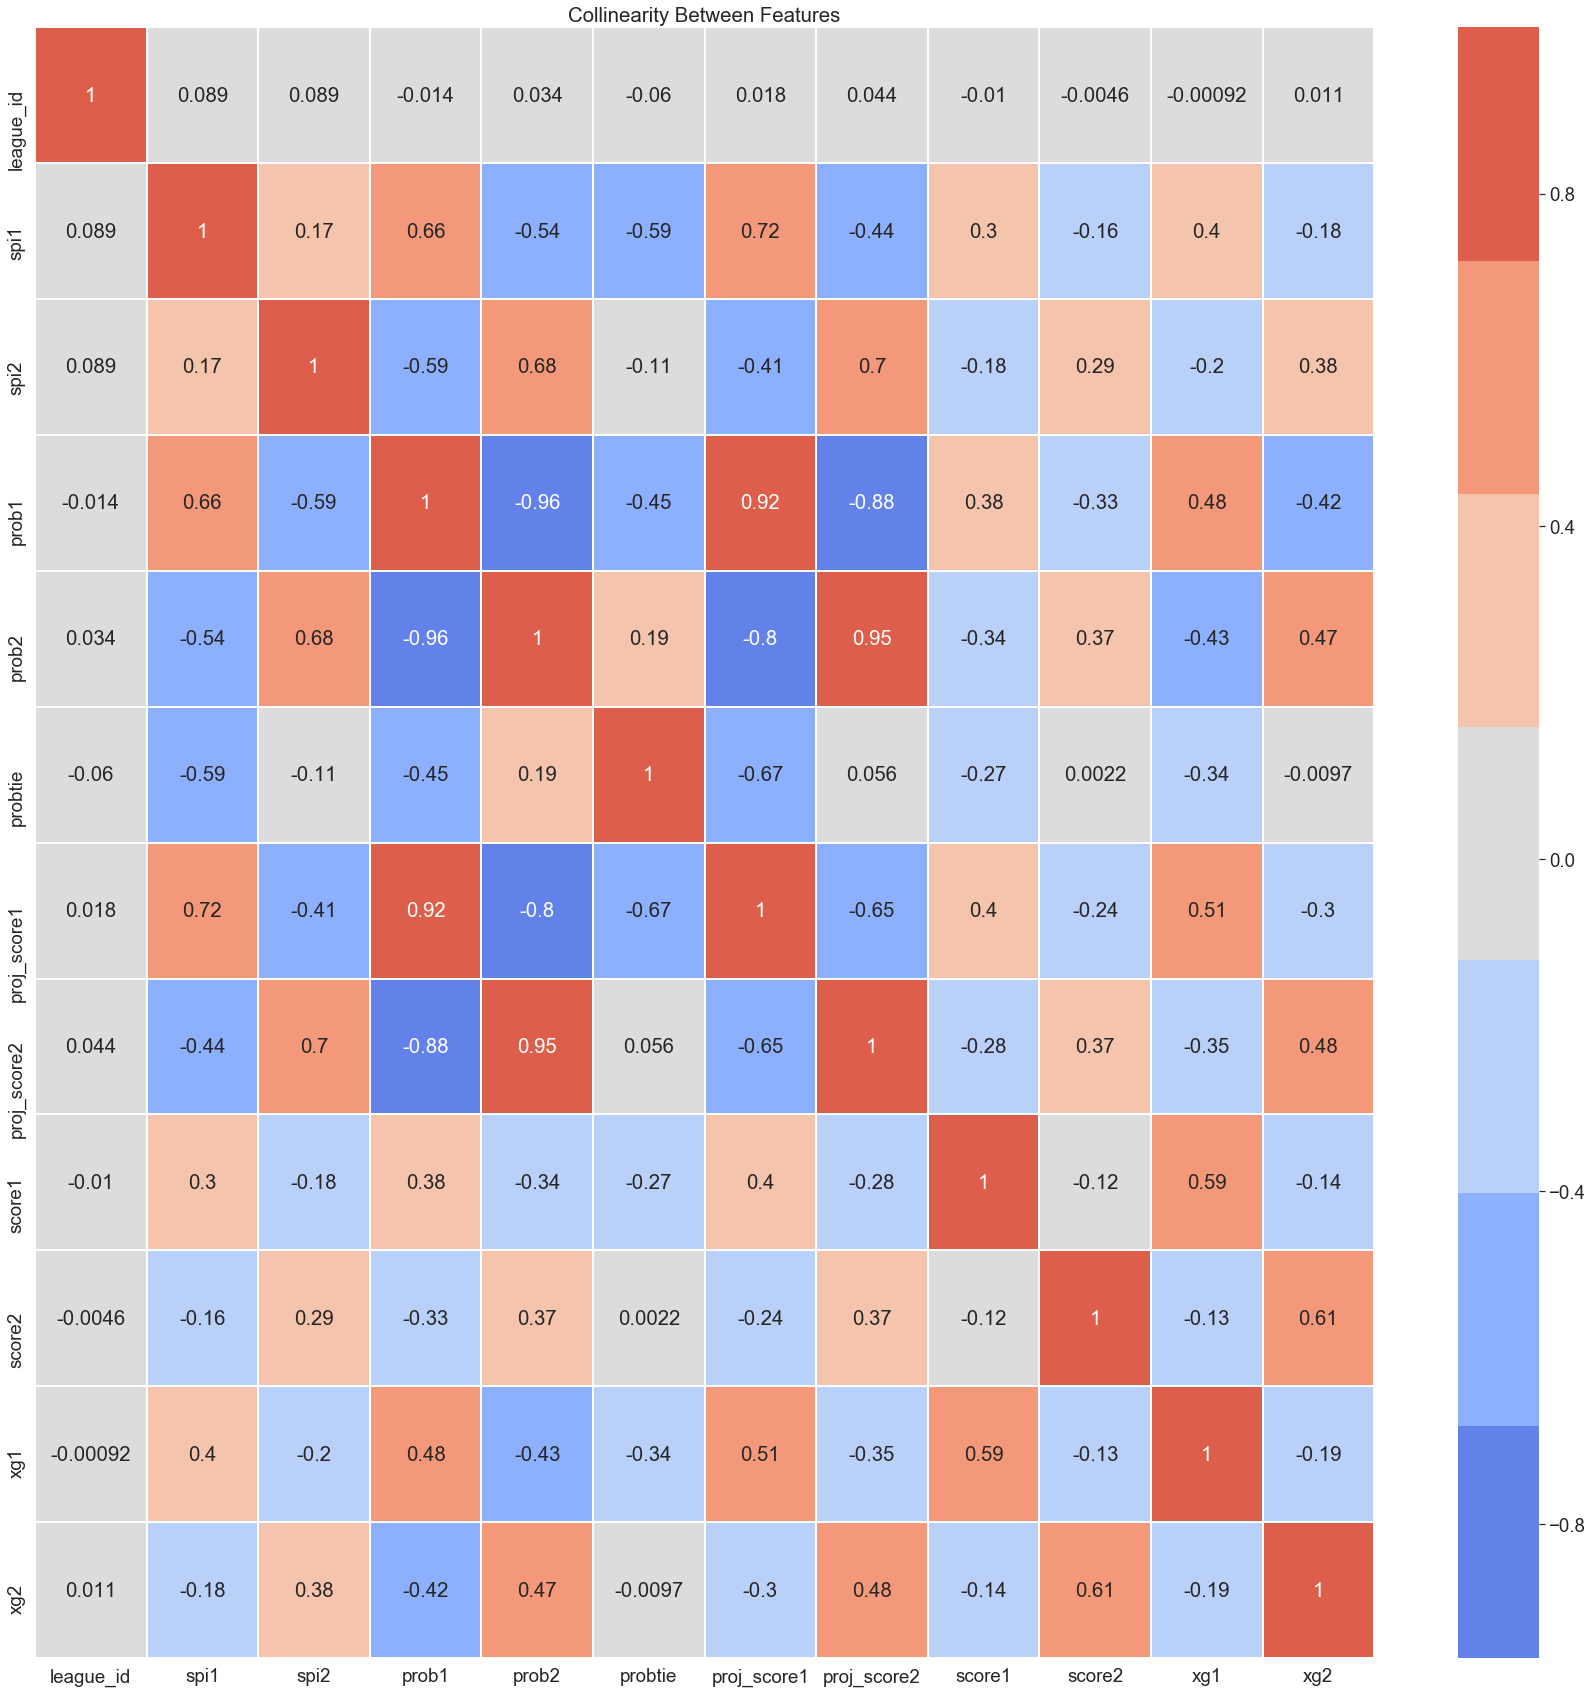

In [10]:
# another look at collinearity 
sns.set(font_scale=1.7)
correlation = match_data_final.corr()
plt.figure(figsize=(30,30))
ax = sns.heatmap(correlation, annot=True, 
                cmap=sns.color_palette("coolwarm", 7),
                linewidth=1, linecolor="white")
plt.title("Collinearity Between Features")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Due to the close correlation between prob1, prob2 and their respective projected score, I'm going to drop the proj_score1 and proj_score2 columns.  

In [11]:
match_data_final = match_data_final.drop(columns=["proj_score1", "proj_score2"])
match_data_final.head(10)

league_id                   league            team1                 team2  \
0     1843.0           French Ligue 1           Bastia   Paris Saint-Germain   
1     1843.0           French Ligue 1        AS Monaco              Guingamp   
2     2411.0  Barclays Premier League        Hull City        Leicester City   
3     2411.0  Barclays Premier League   Crystal Palace  West Bromwich Albion   
4     2411.0  Barclays Premier League          Everton     Tottenham Hotspur   
5     2411.0  Barclays Premier League          Burnley          Swansea City   
6     2411.0  Barclays Premier League    Middlesbrough            Stoke City   
7     2411.0  Barclays Premier League      Southampton               Watford   
8     1843.0           French Ligue 1         Bordeaux            St Etienne   
9     2411.0  Barclays Premier League  Manchester City            Sunderland   

    spi1   spi2   prob1   prob2  probtie  score1  score2   xg1   xg2  
0  51.16  85.68  0.0463  0.8380   0.1157     0.0     1.0  0.97  0.63  
1  68.85  56.48  0.5714  0.1669   0.2617     2.0     2.0  2.45  0.77  
2  53.57  66.81  0.3459  0.3621   0.2921     2.0     1.0  0.85  2.77  
3  55.19  58.66  0.4214  0.2939   0.2847     0.0     1.0  1.11  0.68  
4  68.02  73.25  0.3910  0.3401   0.2689     1.0     1.0  0.73  1.11  
5  58.98  59.74  0.4482  0.2663   0.2854     0.0     1.0  1.24  1.84  
6  56.32  60.35  0.4380  0.2692   0.2927     1.0     1.0  1.40  0.55  
7  69.49  59.33  0.5759  0.1874   0.2367     1.0     1.0  1.05  0.22  
8  62.01  64.92  0.4232  0.2764   0.3004     3.0     2.0  1.03  1.84  
9  86.42  53.64  0.8152  0.0525   0.1323     2.0     1.0  2.14  1.25

In [12]:
match_data_final = match_data_final.drop(columns="league_id")
match_data_final

league           team1                 team2   spi1  \
0                French Ligue 1          Bastia   Paris Saint-Germain  51.16   
1                French Ligue 1       AS Monaco              Guingamp  68.85   
2       Barclays Premier League       Hull City        Leicester City  53.57   
3       Barclays Premier League  Crystal Palace  West Bromwich Albion  55.19   
4       Barclays Premier League         Everton     Tottenham Hotspur  68.02   
...                         ...             ...                   ...    ...   
11196             Italy Serie A  Internazionale               Udinese  84.87   
11197             Italy Serie A       Sampdoria                 Parma  61.63   
11198             Italy Serie A         Crotone            Fiorentina  52.51   
11199             Italy Serie A        Cagliari                 Genoa  57.00   
11200  Spanish Primera Division         Osasuna         Real Sociedad  69.50   

        spi2   prob1   prob2  probtie  score1  score2   xg1   xg2  
0      85.68  0.0463  0.8380   0.1157     0.0     1.0  0.97  0.63  
1      56.48  0.5714  0.1669   0.2617     2.0     2.0  2.45  0.77  
2      66.81  0.3459  0.3621   0.2921     2.0     1.0  0.85  2.77  
3      58.66  0.4214  0.2939   0.2847     0.0     1.0  1.11  0.68  
4      73.25  0.3910  0.3401   0.2689     1.0     1.0  0.73  1.11  
...      ...     ...     ...      ...     ...     ...   ...   ...  
11196  63.23  0.6914  0.1134   0.1952     NaN     NaN   NaN   NaN  
11197  55.90  0.4757  0.2683   0.2560     NaN     NaN   NaN   NaN  
11198  66.84  0.2702  0.4578   0.2721     NaN     NaN   NaN   NaN  
11199  54.17  0.4488  0.2821   0.2690     NaN     NaN   NaN   NaN  
11200  83.36  0.2641  0.4537   0.2822     NaN     NaN   NaN   NaN  

[11201 rows x 12 columns]

In [13]:
# Removing all rows where the score and xg data is absent
fullscore_data = match_data_final[match_data_final['score1'].notna()]
fullscore_data

league           team1                 team2   spi1  \
0               French Ligue 1          Bastia   Paris Saint-Germain  51.16   
1               French Ligue 1       AS Monaco              Guingamp  68.85   
2      Barclays Premier League       Hull City        Leicester City  53.57   
3      Barclays Premier League  Crystal Palace  West Bromwich Albion  55.19   
4      Barclays Premier League         Everton     Tottenham Hotspur  68.02   
...                        ...             ...                   ...    ...   
9721  Spanish Primera Division         Levante                Alavés  67.68   
9722   Barclays Premier League         Arsenal           Aston Villa  81.07   
9723             Italy Serie A        AC Milan                Verona  79.96   
9724            French Ligue 1            Lyon            St Etienne  76.57   
9725  Spanish Primera Division        Valencia           Real Madrid  64.69   

       spi2   prob1   prob2  probtie  score1  score2   xg1   xg2  
0     85.68  0.0463  0.8380   0.1157     0.0     1.0  0.97  0.63  
1     56.48  0.5714  0.1669   0.2617     2.0     2.0  2.45  0.77  
2     66.81  0.3459  0.3621   0.2921     2.0     1.0  0.85  2.77  
3     58.66  0.4214  0.2939   0.2847     0.0     1.0  1.11  0.68  
4     73.25  0.3910  0.3401   0.2689     1.0     1.0  0.73  1.11  
...     ...     ...     ...      ...     ...     ...   ...   ...  
9721  63.78  0.4806  0.2466   0.2729     1.0     1.0  1.86  1.04  
9722  71.42  0.5630  0.2040   0.2330     0.0     3.0  1.70  1.70  
9723  59.55  0.6973  0.1073   0.1954     2.0     2.0  4.13  1.76  
9724  53.28  0.7121  0.0925   0.1955     2.0     1.0  2.93  1.54  
9725  88.57  0.1489  0.6545   0.1966     4.0     1.0  2.39  1.15  

[8137 rows x 12 columns]

In [14]:
# function to loop through df and assign target values
# 0 = draw, 1 = team1(home) win, 2 = team2(away) win
def make_target(df):
    if df['score1'] == df['score2']:
        return 0
    elif df['score1'] > df['score2']:
        return 1
    elif df['score1'] < df['score2']:
        return 2
    else: 
        return 'Undefined'

In [15]:
multiclass_data = fullscore_data.copy()
multiclass_data.head()

league           team1                 team2   spi1  \
0           French Ligue 1          Bastia   Paris Saint-Germain  51.16   
1           French Ligue 1       AS Monaco              Guingamp  68.85   
2  Barclays Premier League       Hull City        Leicester City  53.57   
3  Barclays Premier League  Crystal Palace  West Bromwich Albion  55.19   
4  Barclays Premier League         Everton     Tottenham Hotspur  68.02   

    spi2   prob1   prob2  probtie  score1  score2   xg1   xg2  
0  85.68  0.0463  0.8380   0.1157     0.0     1.0  0.97  0.63  
1  56.48  0.5714  0.1669   0.2617     2.0     2.0  2.45  0.77  
2  66.81  0.3459  0.3621   0.2921     2.0     1.0  0.85  2.77  
3  58.66  0.4214  0.2939   0.2847     0.0     1.0  1.11  0.68  
4  73.25  0.3910  0.3401   0.2689     1.0     1.0  0.73  1.11

In [16]:
multiclass_data['target'] = multiclass_data.apply(make_target, axis=1)
multiclass_data.head()

league           team1                 team2   spi1  \
0           French Ligue 1          Bastia   Paris Saint-Germain  51.16   
1           French Ligue 1       AS Monaco              Guingamp  68.85   
2  Barclays Premier League       Hull City        Leicester City  53.57   
3  Barclays Premier League  Crystal Palace  West Bromwich Albion  55.19   
4  Barclays Premier League         Everton     Tottenham Hotspur  68.02   

    spi2   prob1   prob2  probtie  score1  score2   xg1   xg2  target  
0  85.68  0.0463  0.8380   0.1157     0.0     1.0  0.97  0.63       2  
1  56.48  0.5714  0.1669   0.2617     2.0     2.0  2.45  0.77       0  
2  66.81  0.3459  0.3621   0.2921     2.0     1.0  0.85  2.77       1  
3  58.66  0.4214  0.2939   0.2847     0.0     1.0  1.11  0.68       2  
4  73.25  0.3910  0.3401   0.2689     1.0     1.0  0.73  1.11       0

In [17]:
multiclass_data.target.value_counts()

1    3688
2    2471
0    1978
Name: target, dtype: int64

In [18]:
multiclass_data = multiclass_data.drop(columns="league")

In [19]:
multiclass_data

team1                 team2   spi1   spi2   prob1   prob2  \
0             Bastia   Paris Saint-Germain  51.16  85.68  0.0463  0.8380   
1          AS Monaco              Guingamp  68.85  56.48  0.5714  0.1669   
2          Hull City        Leicester City  53.57  66.81  0.3459  0.3621   
3     Crystal Palace  West Bromwich Albion  55.19  58.66  0.4214  0.2939   
4            Everton     Tottenham Hotspur  68.02  73.25  0.3910  0.3401   
...              ...                   ...    ...    ...     ...     ...   
9721         Levante                Alavés  67.68  63.78  0.4806  0.2466   
9722         Arsenal           Aston Villa  81.07  71.42  0.5630  0.2040   
9723        AC Milan                Verona  79.96  59.55  0.6973  0.1073   
9724            Lyon            St Etienne  76.57  53.28  0.7121  0.0925   
9725        Valencia           Real Madrid  64.69  88.57  0.1489  0.6545   

      probtie  score1  score2   xg1   xg2  target  
0      0.1157     0.0     1.0  0.97  0.63       2  
1      0.2617     2.0     2.0  2.45  0.77       0  
2      0.2921     2.0     1.0  0.85  2.77       1  
3      0.2847     0.0     1.0  1.11  0.68       2  
4      0.2689     1.0     1.0  0.73  1.11       0  
...       ...     ...     ...   ...   ...     ...  
9721   0.2729     1.0     1.0  1.86  1.04       0  
9722   0.2330     0.0     3.0  1.70  1.70       2  
9723   0.1954     2.0     2.0  4.13  1.76       0  
9724   0.1955     2.0     1.0  2.93  1.54       1  
9725   0.1966     4.0     1.0  2.39  1.15       1  

[8137 rows x 12 columns]

Due to XG(expected goal) data not being available before the match, I want to remove that as a feature. In the apps final state, I want to be able to prompt a user for: 2 clubs(the SPIs will be stored in a database), probability for Home win, Away win, and draw and create a prediction from that.  

In [20]:
multiclass_data = multiclass_data.drop(columns=["xg1","xg2"])
multiclass_data

team1                 team2   spi1   spi2   prob1   prob2  \
0             Bastia   Paris Saint-Germain  51.16  85.68  0.0463  0.8380   
1          AS Monaco              Guingamp  68.85  56.48  0.5714  0.1669   
2          Hull City        Leicester City  53.57  66.81  0.3459  0.3621   
3     Crystal Palace  West Bromwich Albion  55.19  58.66  0.4214  0.2939   
4            Everton     Tottenham Hotspur  68.02  73.25  0.3910  0.3401   
...              ...                   ...    ...    ...     ...     ...   
9721         Levante                Alavés  67.68  63.78  0.4806  0.2466   
9722         Arsenal           Aston Villa  81.07  71.42  0.5630  0.2040   
9723        AC Milan                Verona  79.96  59.55  0.6973  0.1073   
9724            Lyon            St Etienne  76.57  53.28  0.7121  0.0925   
9725        Valencia           Real Madrid  64.69  88.57  0.1489  0.6545   

      probtie  score1  score2  target  
0      0.1157     0.0     1.0       2  
1      0.2617     2.0     2.0       0  
2      0.2921     2.0     1.0       1  
3      0.2847     0.0     1.0       2  
4      0.2689     1.0     1.0       0  
...       ...     ...     ...     ...  
9721   0.2729     1.0     1.0       0  
9722   0.2330     0.0     3.0       2  
9723   0.1954     2.0     2.0       0  
9724   0.1955     2.0     1.0       1  
9725   0.1966     4.0     1.0       1  

[8137 rows x 10 columns]

In [21]:
# saving this set as the training set for future use and saving the base multiclass_data 
# dataframe in case I make any mistakes and need to revert. 
training_data = multiclass_data.copy()

In [22]:
training_data = training_data.drop(columns=["team1", "team2"])
training_data.head()

spi1   spi2   prob1   prob2  probtie  score1  score2  target
0  51.16  85.68  0.0463  0.8380   0.1157     0.0     1.0       2
1  68.85  56.48  0.5714  0.1669   0.2617     2.0     2.0       0
2  53.57  66.81  0.3459  0.3621   0.2921     2.0     1.0       1
3  55.19  58.66  0.4214  0.2939   0.2847     0.0     1.0       2
4  68.02  73.25  0.3910  0.3401   0.2689     1.0     1.0       0

In [23]:
club_data.head()

rank  prev_rank                 name                    league   off   def  \
0     1          1        Bayern Munich         German Bundesliga  3.51  0.43   
1     2          2      Manchester City   Barclays Premier League  2.86  0.24   
2     3          3            Barcelona  Spanish Primera Division  3.01  0.50   
3     4          4            Liverpool   Barclays Premier League  2.79  0.46   
4     5          5  Paris Saint-Germain            French Ligue 1  2.89  0.52   

     spi  
0  93.96  
1  92.84  
2  90.16  
3  88.95  
4  88.85

### Visualizations 
#### Target class counts

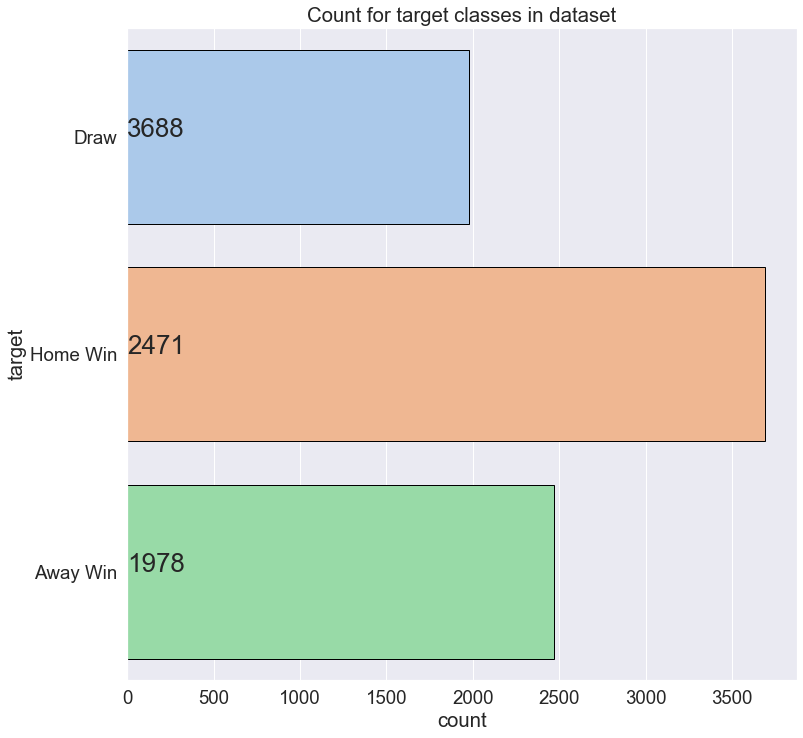

In [24]:
# First I want to see how many instances of each class we have in the dataset 
plt.figure(figsize=(12,12))
ax = sns.countplot(y = training_data.target, palette="pastel",
                  linewidth=1, edgecolor="black")
for i, j in enumerate(training_data["target"].value_counts().values):
    ax.text(.75, i, j, fontsize=26)
plt.title("Count for target classes in dataset")
labels = ["Draw", "Home Win", "Away Win"]
ax.set_yticklabels(labels)
plt.show();

Looking at the spread, it seems more likely the home team wins, and more likely a match ends with a clear winner than with a draw. 

#### Plotted distributions of all features

Plotting the distributions of features in dataset


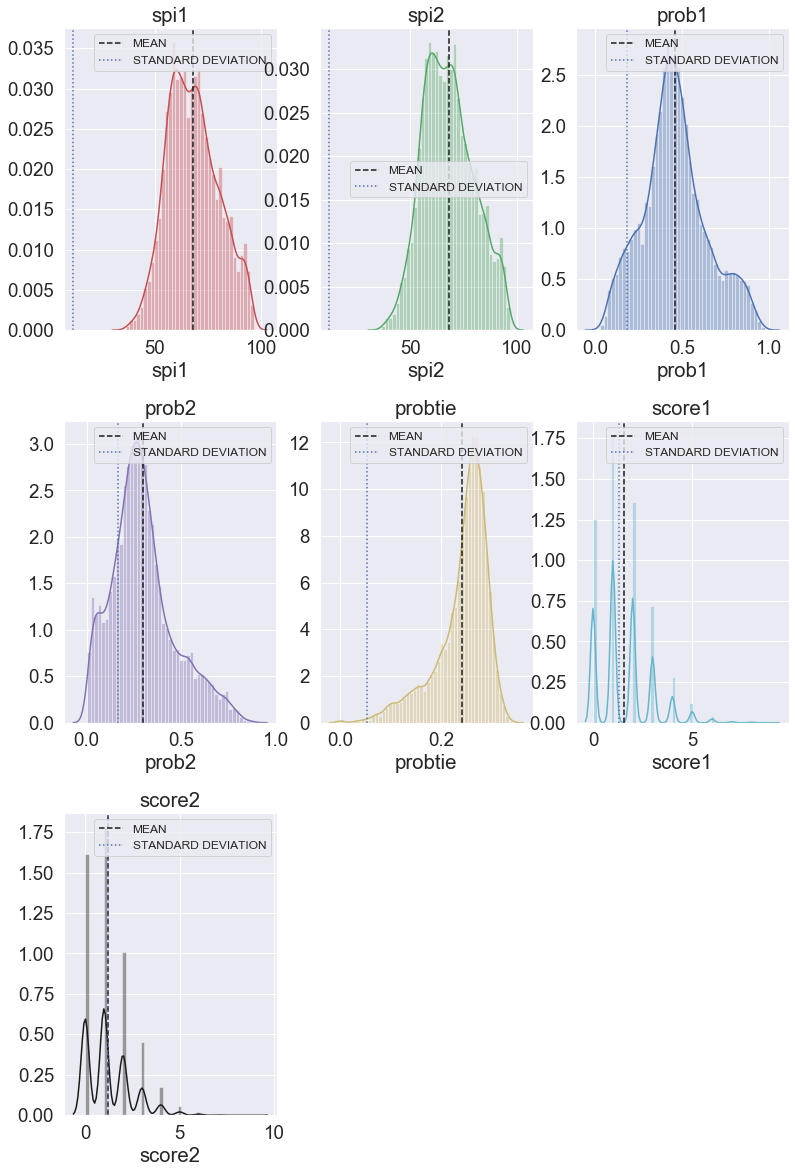

In [25]:
columns = ["spi1", "spi2", "prob1", "prob2", "probtie", "score1", "score2"]
length  = len(columns)
colors  = ["r","g","b","m","y","c","k"] 

plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/2,j+1)
    sns.distplot(training_data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(training_data[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(training_data[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="best", prop={'size':12})
    
print ("Plotting the distributions of features in dataset")


Interestingly enough, SPI and prob1 seems to follow almost a normal distribution. Other than that, there's not much notable information to take from that. 

#### Boxplots for features related to target classes

Boxplots for features related to target_class


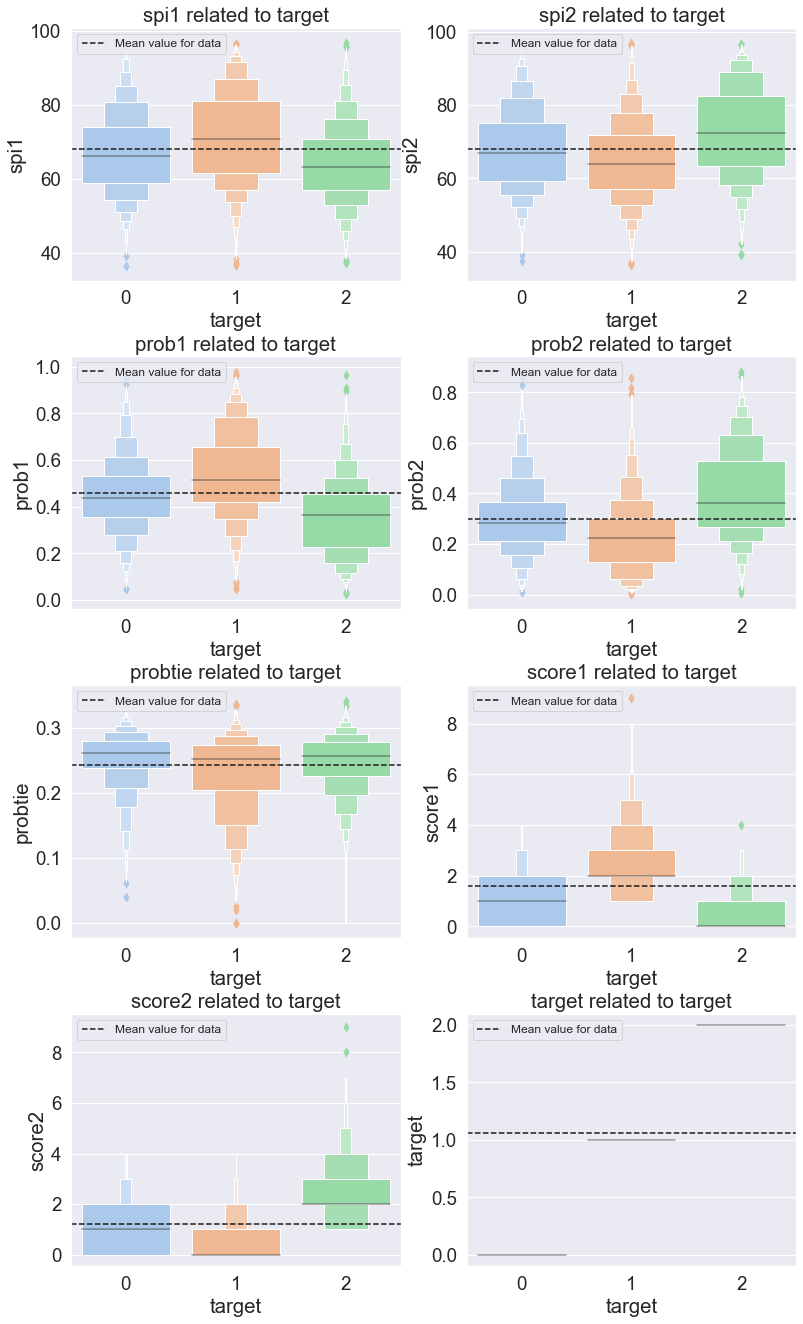

In [26]:
columns = [x for x in training_data.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    plt.subplots_adjust(bottom = 1/50)
    sns.lvplot(x=training_data["target"],y=training_data[i],palette="pastel")
    plt.title(i + " related to target")
    plt.subplots_adjust(hspace=.3)
    plt.axhline(training_data[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="upper left", prop={'size':12})
    
print ("Boxplots for features related to target_class")

#### 3d Plot showing how the pre-match probabilty corresponded to actual results
- Purple = Draw
- Pink = Home Win
- Yellow = Away Win

In [27]:
df = training_data

fig = px.scatter_3d(df, y=training_data["prob1"], x=training_data["prob2"],
                   z=training_data["probtie"], color=training_data["target"],
                   labels={
                       "probtie": "Draw",
                       "prob1": "Home Win",
                       "prob2": "Away Win"
                   }, title= "Predictions vs FT Result")
fig
fig.show()

#Purple = Draw
#Pink = Home Win
#Yellow = Away Win

# PLACEHOLDER FOR EDA SUMMARYRTHHGHDJOFHASFDK ASLDFHJ


### EDA Summary and Feature Explaination 
By looking at the target class counts bar chart, we can clearly see there is a 
slight class imbalance. I think this is indicative of what people refer to as the "home team advantage".  

lkasdjhgfjkazsldhfgisdahfkdshfioasdhfglkdsafklasdhjfoasdlk;f

By looking at the boxplots of the attributes, here are some brief summaries of what is shown:   
- The mean of the IPP appears to be higher for false positives.    
- The standared deviation of the IPP for the false positives appear to be slightly higher and have more upper end outliers.   
- The kurtosis of the IPP seems to be smaller/close to 0 for false positives.   
- The skewness of the IPP again is around 0 for false positives, while for actual pulsars, it is much larger.   
- The mean of the DM-SNR curve is typically higher for actual pulsars, compared to false positives.   
- The standard deviation of the DM-SNR curve is higher for actual pulsars than false positives.  
- The kurtosis of the DM-SNR curve is higher for false positives than for actual pulsars.   
- The skewness of the DM-SNR curve is significantly higher for false positives than for actual pulsars.    

Finally, we can see again in the histograms that there are no normal distributions and 
none of our data is categorical. 

# Model the Data
In this section I'll normalize the dataset and use a variety of classifiers to create a a few models to see what performs best in this context. "Best" is going to be related to the model accuracy as a metric of success over the baseline 33% random guess.    

#### First, I'll bring in a modeling function I wrote for a past project and instantiate the classifiers.
I've commented out the roc curve due to multi-class not being supported. 

In [37]:
# Function to combine classification report, confusion matrix, 
# accuracy score, roc curve, and auc in one easy way

def model(algorithm, X_train, y_train, X_test, y_test, of_type):
    algorithm.fit(X_train, y_train.astype(int))
    preds = algorithm.predict(X_test)
    
    print(algorithm)
    print("\naccuracy_score:",accuracy_score(y_test, preds))
    print("\nclassification report:\n", (classification_report(y_test, preds)))
    
    plt.figure(figsize=(14,10))
    plt.subplot(221)
    ax = sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d", 
                linecolor="k", linewidth=2)
    # work around for top & bottom cutoff is pasted below
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title("Confusion Matrix", fontsize=20)
    
    '''
    predicting_probabilities = algorithm.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, predicting_probabilities)
    plt.subplot(222)
    plt.plot(fpr, tpr, label = ("Area Under the Curve:", auc(fpr, tpr)), color="r")
    plt.plot([1,0], [1,0], linestyle = "dashed", color="k")
    plt.legend(loc="best")
    plt.title("ROC Curve and Area Under Curve", fontsize=20)
    '''
    
    if of_type == "feat":
        dataframe = pd.DataFrame(algorithm.feature_importances_, X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features", 0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients", ascending=False)
        # plot conf_matrix, roc/auc, and feat importances
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients", y = "features", data = dataframe, palette = "husl")
        plt.title("Feature Importances", fontsize=20)
        for i, j in enumerate(dataframe["coefficients"]):
            ax.text(.011, i, j, weight = "bold")
        
    elif of_type == "coef":
        dataframe = pd.DataFrame(algorithm.coef_.ravel(), X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features", 0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients", ascending=False)
        # plot conf_matrix, roc/auc, and feat importances
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients", y = "features", data = dataframe, palette = "husl")
        plt.title("Feature Importances", fontsize=20)
        for i, j in enumerate(dataframe["coefficients"]):
            ax.text(.011, i, j, weight = "bold")
            
    elif of_type == "none":
        return(algorithm)

In [29]:
# creating classifiers
dt = DecisionTreeClassifier() # feat

# K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=4) # none

# Support Vector Machine
# svc = svm.SVC(decision_function_shape='ovo')

# Random Forest 
rf = RandomForestClassifier() # feat

# XGBoost 
xgb = xgb.XGBClassifier(random_state=rng) # feat


### Transformation and Normalization
Below I'll normalize a cloned dataset to be modeled alongside with and compared to the raw dataset. 

In [44]:
TNdata = training_data.copy()
TNdata.head()

spi1   spi2   prob1   prob2  probtie  score1  score2  target
0  51.16  85.68  0.0463  0.8380   0.1157     0.0     1.0       2
1  68.85  56.48  0.5714  0.1669   0.2617     2.0     2.0       0
2  53.57  66.81  0.3459  0.3621   0.2921     2.0     1.0       1
3  55.19  58.66  0.4214  0.2939   0.2847     0.0     1.0       2
4  68.02  73.25  0.3910  0.3401   0.2689     1.0     1.0       0

In [31]:
# sklearn's MinMaxScaler
x = TNdata.values # returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
TNdata = pd.DataFrame(x_scaled, columns = TNdata.columns)

In [32]:
TNdata.head()

spi1      spi2     prob1     prob2   probtie    score1    score2  \
0  0.245305  0.816316  0.019170  0.951990  0.338008  0.000000  0.111111   
1  0.539305  0.333113  0.572256  0.186680  0.764534  0.222222  0.222222   
2  0.285358  0.504054  0.334738  0.409283  0.853345  0.222222  0.111111   
3  0.312282  0.369187  0.414262  0.331509  0.831727  0.000000  0.111111   
4  0.525511  0.610624  0.382241  0.384194  0.785568  0.111111  0.111111   

   target  
0     1.0  
1     0.0  
2     0.5  
3     1.0  
4     0.0

In [33]:
#confirm the transformation didn't affect the target class
TNdata.target.value_counts()

0.5    3688
1.0    2471
0.0    1978
Name: target, dtype: int64

### Train and Test Splits
Now to separate out the target class from the predictor variables and do a train-test split for both sets of data, and account for XGBoost. I've opted to do a 75/25 split. 

In [48]:
# define X and y of our datasets
# the TNdata is the Transformed-Normalized set
y_TN = TNdata['target']
X_TN = TNdata.drop(columns=['target', 'score1', 'score2'], axis=1)

y = training_data['target']
X = training_data.drop(columns=['target', 'score1', 'score2'], axis=1)

# random seed is already defined as the variable rng.

# split data into the train and test sets
X_train_TN, X_test_TN, y_train_TN, y_test_TN = train_test_split(X_TN, 
                                                    y_TN, 
                                                    test_size=0.25, 
                                                    random_state=rng)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=rng)

# split in numpy array format for XGBoost
X_train_xgb_TN, X_test_xgb_TN, y_train_xgb_TN, y_test_xgb_TN = train_test_split(X_TN.values, 
                                                                    y_TN.values, 
                                                                    test_size=0.25, 
                                                                    random_state=rng)

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X.values, 
                                                                    y.values, 
                                                                    test_size=0.25, 
                                                                    random_state=rng)


### Baseline Accuracy 

I will first be comparing my model accuracy to the baseline of random choice. Disregarding odds, there's a 33% chance of choosing the correct match result. The minimum goal is to greatly improve from that, and the ideal goal is to improve from the bookmaker odds. 

### Decision Tree

DecisionTreeClassifier()

accuracy_score: 0.42555282555282553

classification report:
               precision    recall  f1-score   support

           0       0.25      0.26      0.26       483
           1       0.53      0.53      0.53       922
           2       0.41      0.40      0.40       630

    accuracy                           0.43      2035
   macro avg       0.40      0.40      0.40      2035
weighted avg       0.43      0.43      0.43      2035



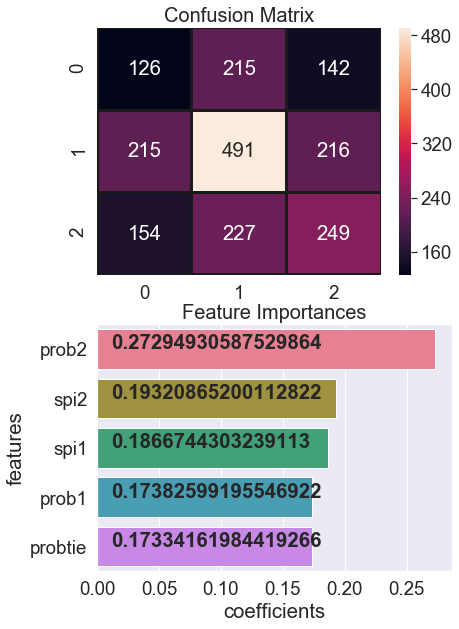

In [52]:
# raw data
model(dt, X_train, y_train, X_test, y_test, "feat")

DecisionTreeClassifier()

accuracy_score: 0.8530712530712531

classification report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       483
           1       0.88      0.89      0.88       922
           2       0.85      0.85      0.85       630

    accuracy                           0.85      2035
   macro avg       0.85      0.84      0.84      2035
weighted avg       0.85      0.85      0.85      2035



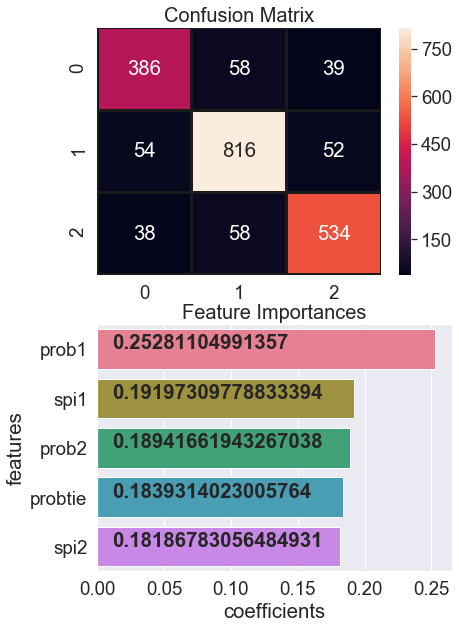

In [53]:
# normalized data
model(dt, X_train_TN, y_train_TN, X_test, y_test, "feat")

The non-normalized data performed horribly, only marginally better than a random guess. The normalized data performed well, I will later look into feature engineering to see just how good we can get it to perform.  

### Random Forest

RandomForestClassifier()

accuracy_score: 0.4968058968058968

classification report:
               precision    recall  f1-score   support

           0       0.26      0.16      0.20       483
           1       0.56      0.69      0.62       922
           2       0.50      0.48      0.49       630

    accuracy                           0.50      2035
   macro avg       0.44      0.44      0.43      2035
weighted avg       0.47      0.50      0.48      2035



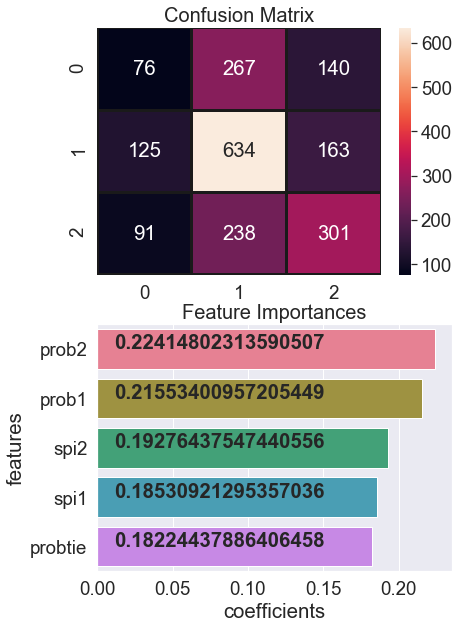

In [54]:
# raw data
model(rf, X_train, y_train, X_test, y_test, "feat")

RandomForestClassifier()

accuracy_score: 0.8624078624078624

classification report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       483
           1       0.85      0.93      0.89       922
           2       0.88      0.83      0.85       630

    accuracy                           0.86      2035
   macro avg       0.87      0.84      0.85      2035
weighted avg       0.86      0.86      0.86      2035



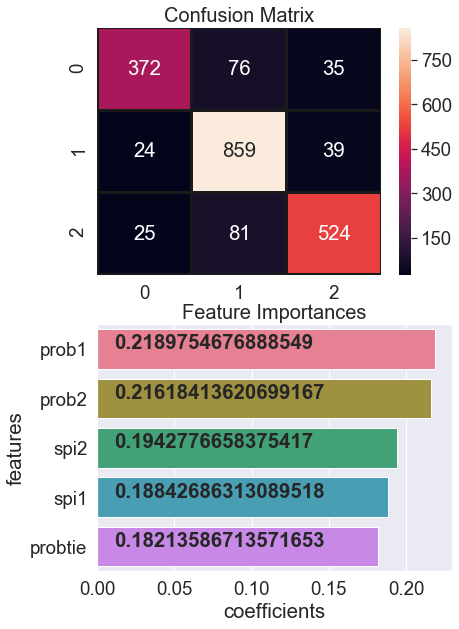

In [55]:
# normalized data
model(rf, X_train_TN, y_train_TN, X_test, y_test, "feat")

Again, the non-normalized data performed quite badly. The normalized data did well, as could be expected by our Decision Tree's performance. The Decision Tree and Random Forest models will continue to be optimized in the feature engineering process below. 

### K Nearest Neighbor

KNeighborsClassifier(n_neighbors=4)

accuracy_score: 0.46093366093366095

classification report:
               precision    recall  f1-score   support

           0       0.26      0.28      0.27       483
           1       0.55      0.62      0.59       922
           2       0.47      0.37      0.41       630

    accuracy                           0.46      2035
   macro avg       0.43      0.42      0.42      2035
weighted avg       0.46      0.46      0.46      2035



KNeighborsClassifier(n_neighbors=4)

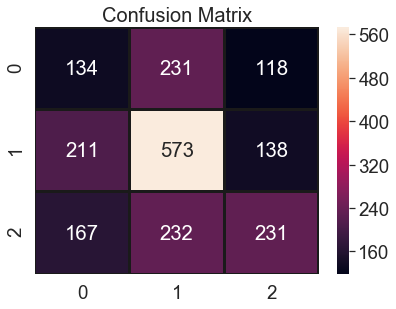

In [56]:
# raw data
model(knn, X_train, y_train, X_test, y_test, "none")

KNeighborsClassifier(n_neighbors=4)

accuracy_score: 0.6054054054054054

classification report:
               precision    recall  f1-score   support

           0       0.48      0.51      0.49       483
           1       0.65      0.74      0.69       922
           2       0.64      0.48      0.55       630

    accuracy                           0.61      2035
   macro avg       0.59      0.58      0.58      2035
weighted avg       0.61      0.61      0.60      2035



KNeighborsClassifier(n_neighbors=4)

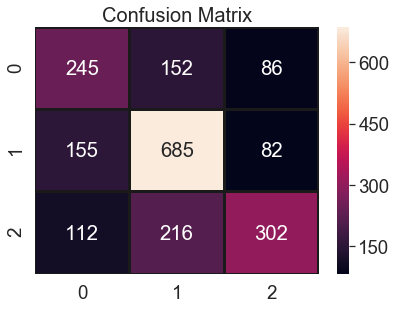

In [57]:
# normalized data
model(knn, X_train_TN, y_train_TN, X_test, y_test, "none")

The KNN models both were mediocre at best, the non-normalized one performing a bit worse than the normalized. The raw data model will likely be discarded, but I'll do some feature engineering on the KNN model to see if there are some improvements to be made. 

### XGBoost

In [60]:
# testing with non-normalized data
clf = XGBClassifier(random_state=rng)
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 86.07%
Validation accuracy: 51.94%


In [62]:
xgbo = XGBClassifier(random_state=rng)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=1883646923, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

accuracy_score: 0.5194103194103195

classification report:
               precision    recall  f1-score   support

           0       0.29      0.14      0.19       483
           1       0.57      0.74      0.64       922
           2       0.51      0.48      0.50       630

    accuracy                           0.52      2035
   macro avg       0.46      0.

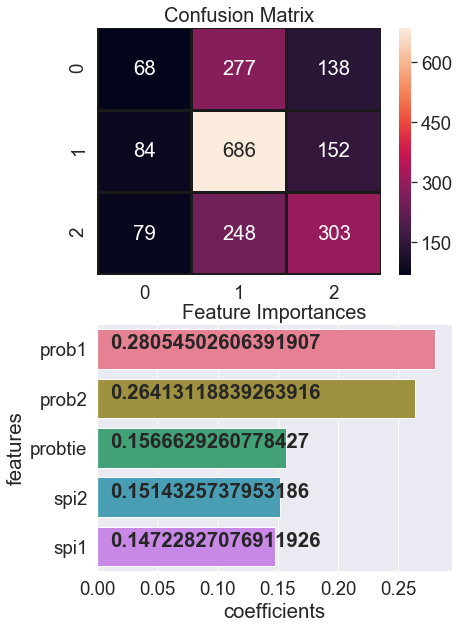

In [63]:
# raw XGB
model(xgbo, X_train, y_train, X_test, y_test, "feat")

In [64]:
# testing with normalized data
clf = XGBClassifier(random_state=rng)
clf.fit(X_train_TN, y_train_TN)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 76.7%
Validation accuracy: 75.87%


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=1467461900, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

accuracy_score: 0.7587223587223587

classification report:
               precision    recall  f1-score   support

           0       0.83      0.52      0.64       483
           1       0.73      0.91      0.81       922
           2       0.79      0.71      0.75       630

    accuracy                           0.76      2035
   macro avg       0.78      0.

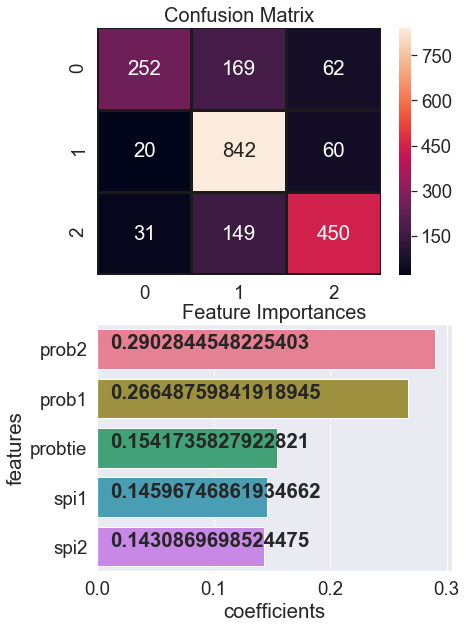

In [66]:
# Transformed/normalized XGBoost
model(xgbo, X_train_TN, y_train_TN, X_test, y_test, "feat")

The raw data XGBoost didn't perform well, but it did okay with the transformed/normalized data. XGBoost has a low run-time and can be feature engineered to perform quite well. Below, I'll work on the feature engineering phase to see what algorithm I'll select for my final model. 

### Summary of Models
Due to their horrible levels of performance, the models built off of the raw dataset will be ignored entirely for this comparison. The table below describes the performance of the models:


| Classifier | Accuracy Score | Macro Avg. F1 Score | Weighted Avg. F1 score | False Pos | False Neg |
| --- | --- | --- | --- | --- | --- |
| XGBoost | 77 | .76 | .73 | .75 | 291 | 200 |
| Random Forest | 86 | .85 | .86 | 150 | 130 |
| Decision Tree | 85 | .84 | .85 | 149 | 150 |
| KNN | 61 | .58 | .60 | 320 | 483 |

## Tuning Model Hyperparameters

In this stage, I'll take the 4 models using the transformed/normalized data, and look to increase their performance via GridSearch to find the ideal parameters. 

#### GridSearch Optimization for KNN

In [69]:
# create new KNN object
knnTuned = KNeighborsClassifier()

# List hyperparameters to tune
leaf_size = list(range(1, 50))
n_neighbors = list(range(1, 30))
p=[1,2]

# convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

clf = GridSearchCV(knnTuned, hyperparameters, cv=10)

# fit the model
best_KNN = clf.fit(X_train_TN, y_train_TN)

print('Best leaf_size:', best_KNN.best_estimator_.get_params()
      ['leaf_size'])
print('Best p:', best_KNN.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_KNN.best_estimator_.get_params()
      ['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 25


In [70]:
KNN_tuned = KNeighborsClassifier(leaf_size=1,
                                n_neighbors=25,
                                p=1)

KNeighborsClassifier(leaf_size=1, n_neighbors=25, p=1)

accuracy_score: 0.547911547911548

classification report:
               precision    recall  f1-score   support

           0       0.37      0.16      0.22       483
           1       0.57      0.79      0.66       922
           2       0.57      0.49      0.53       630

    accuracy                           0.55      2035
   macro avg       0.50      0.48      0.47      2035
weighted avg       0.52      0.55      0.51      2035



KNeighborsClassifier(leaf_size=1, n_neighbors=25, p=1)

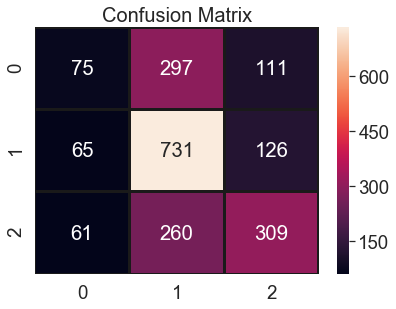

In [71]:
model(KNN_tuned, X_train_TN, y_train_TN, X_test, y_test, "none")

#### GridSearch Optimization for Decision Tree

In [81]:
dtTuned.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [87]:
# create new decision tree object
dtTuned = DecisionTreeClassifier()

# List hyperparameters to tune
hyperparameters = {
    'min_samples_split' : [1, 10, 20, 30, 40],
    'min_samples_leaf' : [1, 5, 10, 15, 20],
    'max_depth' : [10, 25, 50, 65, 80, 100],
    'criterion': ['gini','entropy'],
    'class_weight' : [None, "balanced"]
}

clf = GridSearchCV(dtTuned, hyperparameters, cv=10)

# fit the model
best_DT = clf.fit(X_train_TN, y_train_TN)

print(f"Optimal Parameters: {best_DT.best_params_}")

Optimal Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 40}


In [ ]:
dtTuned = DecisionTreeClassifier()

#### GridSearch Optimization for Random Forest

#### GridSearch Optimization for XGBoost

# Interpret the Data - Conclusion

Here in the final step, I examine the findings developed by modeling and indentify important insights. As more data becomes available, this cycle can repeat and continue in a loop to build a faster, less biased, and more accurate model. For now, I'll review the models completed with the data available.  

### Model Performance (Top 3 models, comparing metrics)
